<a href="https://colab.research.google.com/github/Reem-KR/GEOL-558_-Unsupervised_Learning_Project/blob/main/Log_Data_Analysis_Unsupervised_First_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Log Data Analysis

Reem Alrowaished

January 19 2025

## Introduction:

In this unsupervised learning project, I aim to explore the relationships between various well log measurements such as Gamma Ray, Density, Resistivity,  Caliper and others to identify patterns, clusters, and anomalies. Hopefully this will help me uncover hidden patterns or regions with similar geological properties that could help in targeting exploration efforts more efficiently.

Dataset Source:
https://www.kaggle.com/datasets/prateekvyas/well-log-data



## Section 1: Data Cleaning and Overview

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Import the Dataset file from Github
url = "https://raw.githubusercontent.com/Reem-KR/GEOL-558_-Unsupervised_Learning_Project/main/Kansas_Geological_Survey_log.csv"

# Read the CSV file from GitHub and create a dataframe
original_data = pd.read_csv(url)

# Show the first 5 rows
original_data.head(5)

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
0,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576
1,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495
2,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944
3,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645
4,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659


In [ ]:
# Check the number of rows and columns of the dataframe
rows, columns = original_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 8739
The number of columns is: 14


In [ ]:
# Check for missing data in the entire dataset
missing_data = original_data.isnull().sum()
missing_data

,0
Depth,0
RxoRt,0
RLL3,0
SP,0
RILD,0
MN,0
MI,0
MCAL,0
DCAL,0
RHOB,0


In [ ]:
# Information of the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   8739 non-null   float64
 1   RxoRt   8739 non-null   float64
 2   RLL3    8739 non-null   float64
 3   SP      8739 non-null   float64
 4   RILD    8739 non-null   float64
 5   MN      8739 non-null   float64
 6   MI      8739 non-null   float64
 7   MCAL    8739 non-null   float64
 8   DCAL    8739 non-null   float64
 9   RHOB    8739 non-null   float64
 10  RHOC    8739 non-null   float64
 11  DPOR    8739 non-null   float64
 12  CNLS    8739 non-null   float64
 13  GR      8739 non-null   float64
dtypes: float64(14)
memory usage: 956.0 KB


In [ ]:
# Understanding the dataset
original_data.describe()

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
count,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.00000,8739.000000,8739.0000,8739.000000,8739.000000
mean,2535.727372,-18.493591,37.948919,-94.299762,34.511874,11.714442,12.180632,5.906369,3.669944,2.03364,0.126320,39.5532,20.129247,76.948923
std,1358.246302,31.420924,81.734581,39.652558,251.238360,27.537012,28.874862,1.305561,2.748873,0.41571,0.103907,24.3105,11.427909,33.859411
min,195.000000,-150.821900,0.389900,-201.623000,0.210400,-0.527400,-0.673500,5.047400,1.885300,1.19050,-0.670500,-1.8873,-0.513900,0.005800
25%,1292.250000,-31.993950,6.430800,-131.421100,4.356500,0.306700,0.097650,5.089800,1.919350,1.68905,0.049600,14.8416,8.888250,52.336950
50%,2623.500000,-16.509300,12.138400,-95.587500,7.822900,0.970300,0.361700,5.098500,1.977500,2.00030,0.109800,41.5051,21.053800,77.034000
75%,3715.750000,-5.941450,25.696300,-58.054000,19.486800,7.978100,7.307150,7.764550,7.850000,2.45620,0.210100,59.7036,29.544100,96.306700
max,4808.000000,247.583200,880.859400,69.895300,11510.641600,252.124200,234.871500,10.308600,12.334900,2.74230,0.357500,88.8601,47.581000,404.288100


## Section 2: Visualization

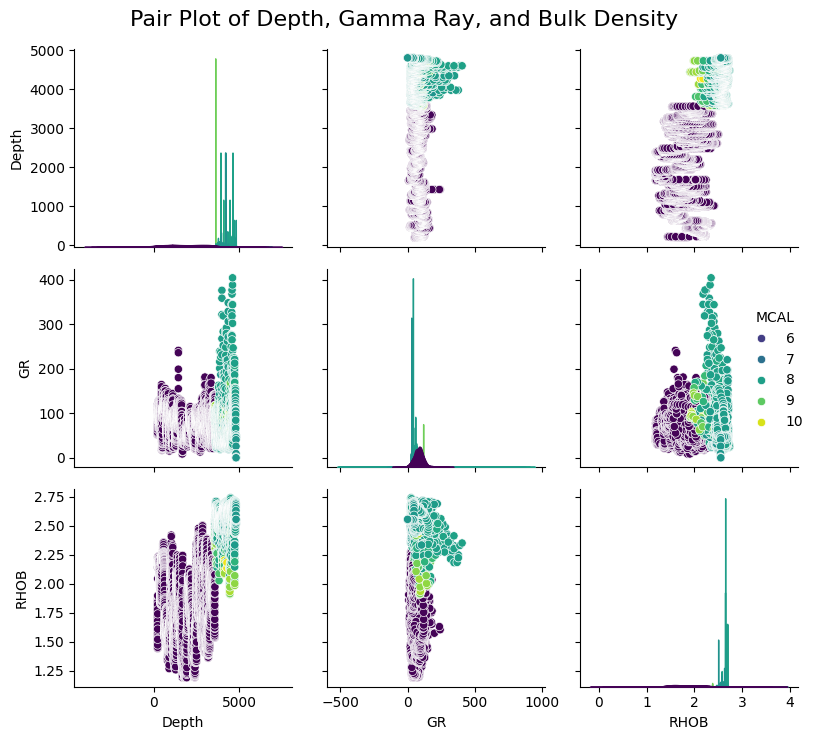

In [ ]:
# Figure 1:

# Create a pair plot for selected columns to show the realtionsip between depth, bulk density, and Gamma Ray
sns.pairplot(
    original_data,
    vars=['Depth','GR','RHOB'],       # Data columns to include
    hue= 'MCAL',                      # Color the points by Caliper data
    palette='viridis'                 # Specify color palette
)

# Add title
plt.suptitle('Pair Plot of Depth, Gamma Ray, and Bulk Density', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Check the minimum and maximum of MCAL

print(original_data['MCAL'].min())
print(original_data['MCAL'].max())

5.0474
10.3086


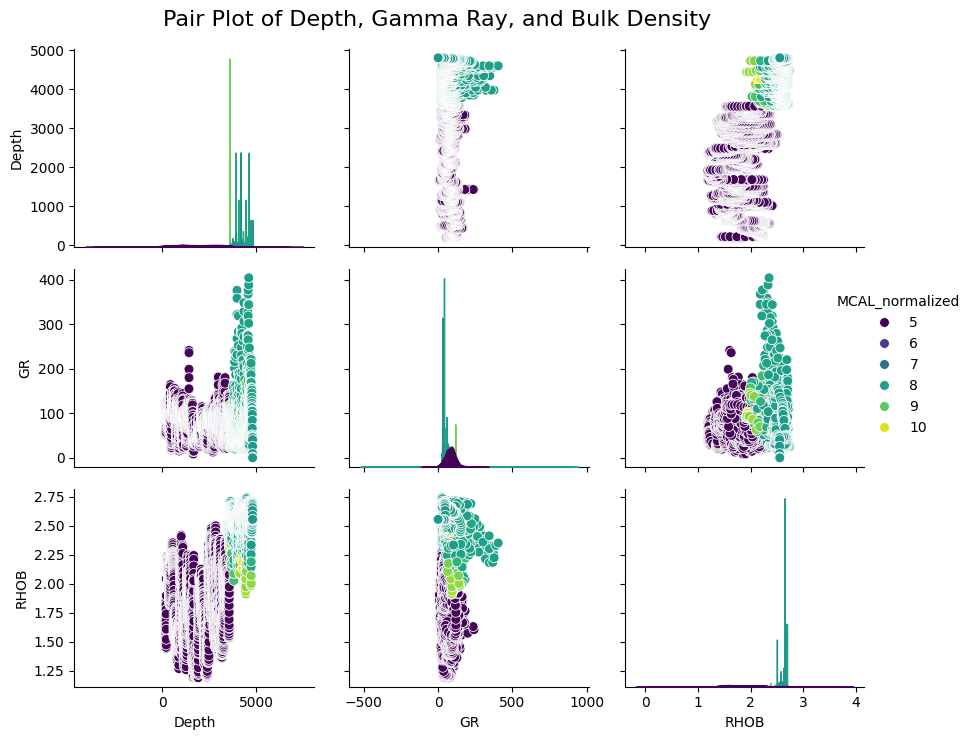

In [ ]:
# Figure 1 Edited:

# I will normalize MCAL values to start from 5, since without normalization, the color scale starts at 6, while the data starts at 5 and the mean value is 5.9

from sklearn.preprocessing import MinMaxScaler
from matplotlib import colors

# Normalize MCAL to start from 5
scaler = MinMaxScaler(feature_range=(5, original_data['MCAL'].max()))  # Scale between 5 and max MCAL value
original_data['MCAL_normalized'] = scaler.fit_transform(original_data[['MCAL']])

# Create the pair plot with hue set to MCAL_normalized
grid = sns.pairplot(
    original_data,
    vars=['Depth', 'GR', 'RHOB'],         # Data columns to include
    hue='MCAL_normalized',                # Use the normalized MCAL values for hue
    palette='viridis',                    # Specify the color palette
    plot_kws={'s': 50},                   # Adjust the size of the points
    height=2.5,                           # Adjust the size of each plot

)

# Add a title
plt.suptitle('Pair Plot of Depth, Gamma Ray, and Bulk Density', fontsize=16)

# Manually control the legend's position to move it to the right more
grid._legend.set_bbox_to_anchor((1.1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

**Figure 1 edited:**

The Seaborn pair plot visualizes the relationships between three variables in  my dataset, which includes Depth value , Gamma Ray log (GR), and Bulk Density log(RHOB). The plot is color-coded based on the normalized values of the caliper log (MCAL), which provides an additional way to understand the borehole size in relation to these other variables. This helps us visuilze if the readings are accurate or can they be an anaomoly due to any washouts.



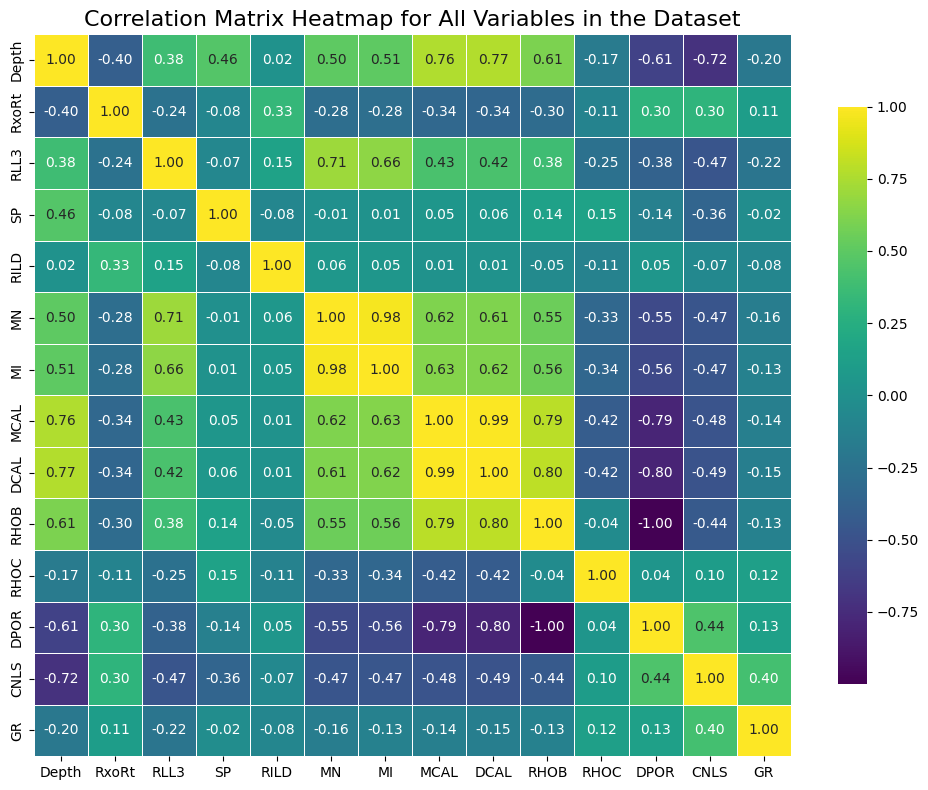

In [ ]:
# Figure 2:

# Calculate the correlation matrix for the entire dataset but dropping the 'MCAL_normalized' column created in the previous step
correlation_matrix = original_data.drop(columns=['MCAL_normalized']).corr()  # Excluded MCAL_normalized

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,                # Annotate each cell with the numeric value
            cmap='viridis',            # Specify the Color palette
            fmt='.2f',                 # Format the numbers to two decimal places
            linewidths=0.5,            # Line width between the cells
            cbar_kws={'shrink': 0.8})  # Adjust color bar size

# Add a title
plt.title('Correlation Matrix Heatmap for All Variables in the Dataset', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

**Figure 2:**

The plot shows the correlation matrix heatmap for my entire dataset. We can see that there is a:

1- Strong positive correlations: Between Depth and MCAL (Normal caliper), and between MN (Resistivity wide array) and MI (Resistivity Intermediate Array).

2- Strong negative correlations: Between MCAL and DPOR (Density Porosity), and RHOB (Bulk Density) and DPOR.

3- Moderate correlations: Between variables such as DCAL (Differential Caliper)and RHOB, and RxoRt (Ratio of Shallow and deep resistivity in well) and RLL3 (Laterlog 3 data).

4- Weak or no correlations: Between variables like SP (spontaneous data) and GR, and RILD (Deep Induction resistivity data) and GR.


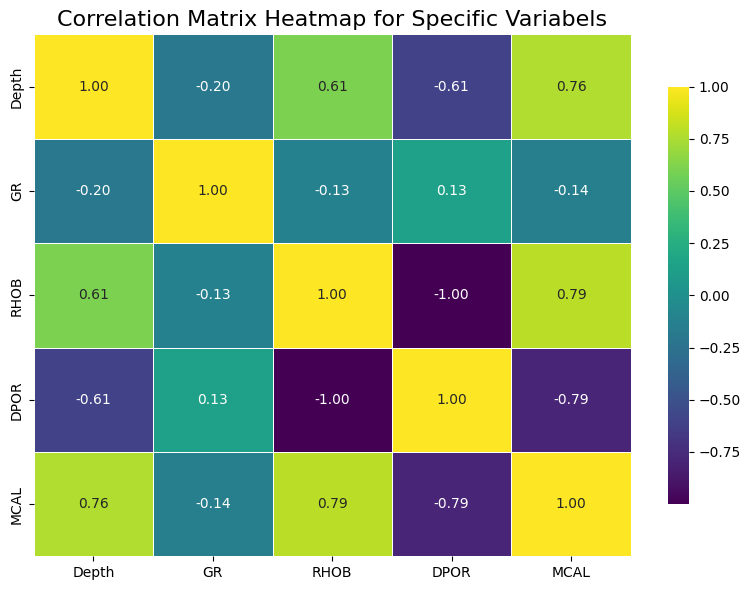

In [ ]:
# Figure 3:

# Calculate the correlation matrix for specific variables
correlation_matrix = original_data[['Depth', 'GR', 'RHOB', 'DPOR', 'MCAL']].corr()  # Select the columns you want to include

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(correlation_matrix,
            annot=True,                 # Annotate each cell with the numeric value
            cmap='viridis',             # Specify the Color palette
            fmt='.2f',                  # Format the numbers to two decimal places
            linewidths=0.5,             # Line width between the cells
            cbar_kws={'shrink': 0.8})   # Adjust color bar size

# Add a title
plt.title('Correlation Matrix Heatmap for Specific Variabels', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


**Figure 3:**

The plot shows the correlation matrix heatmapfor a selected set of variables, which include Depth, Gamma Ray (GR), Bulk Density (RHOB), Density Porosity (DPOR), and Normal Caliper (MCAL).  We can see that there is a:

1- Strong Positive Correlations between Depth and MCAL and MCAL and RHOB.

2- Strong Negative Correlations between DPOR and RHOB and Depth and DPOR.

3- Moderate to weak Correlations between GR and Depth,  GR and MCAL, GR and RHOB, GR and DPOR, and MCAL and DPOR.


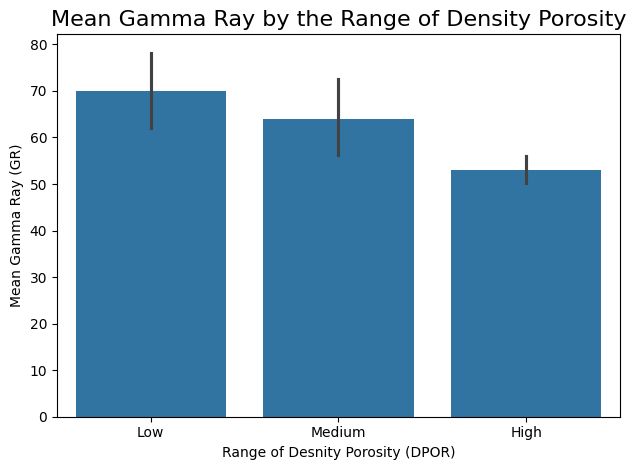

In [ ]:
# Figure 4:

# Bar Plot

# Create new column to categorized DPOR into  low, medium, and high
# Adjust the bins based on the distribution of DPOR my data
original_data['DPOR_category'] = pd.cut(original_data['DPOR'], bins=[0, 1.5, 2, 3], labels=['Low', 'Medium', 'High'])

# Create a bar plot to compare the mean Gamma Ray (GR) across different DPOR categories
sns.barplot(x='DPOR_category', y='GR', data=original_data)

# Add a title and labels
plt.title('Mean Gamma Ray by the Range of Density Porosity', fontsize=16)
plt.xlabel('Range of Desnity Porosity (DPOR)')
plt.ylabel('Mean Gamma Ray (GR)')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 4:**

This bar plot shows the mean Gamma Ray (GR) values for different ranges of Density Porosity (DPOR) categorized into Low, Medium, and High. The vertical lines extending from the tops of the bars represent the standard error of the mean for the mean GR values, showing the uncertainty around the mean estimate. We can see that there is an inverse relationship between Density Porosity, where higher DPOR values tend to have lower GR values, and lower DPOR values tend to have higher GR values. This makes sense since Lower GR can be an indication of Sand which is known to have higher porosity.


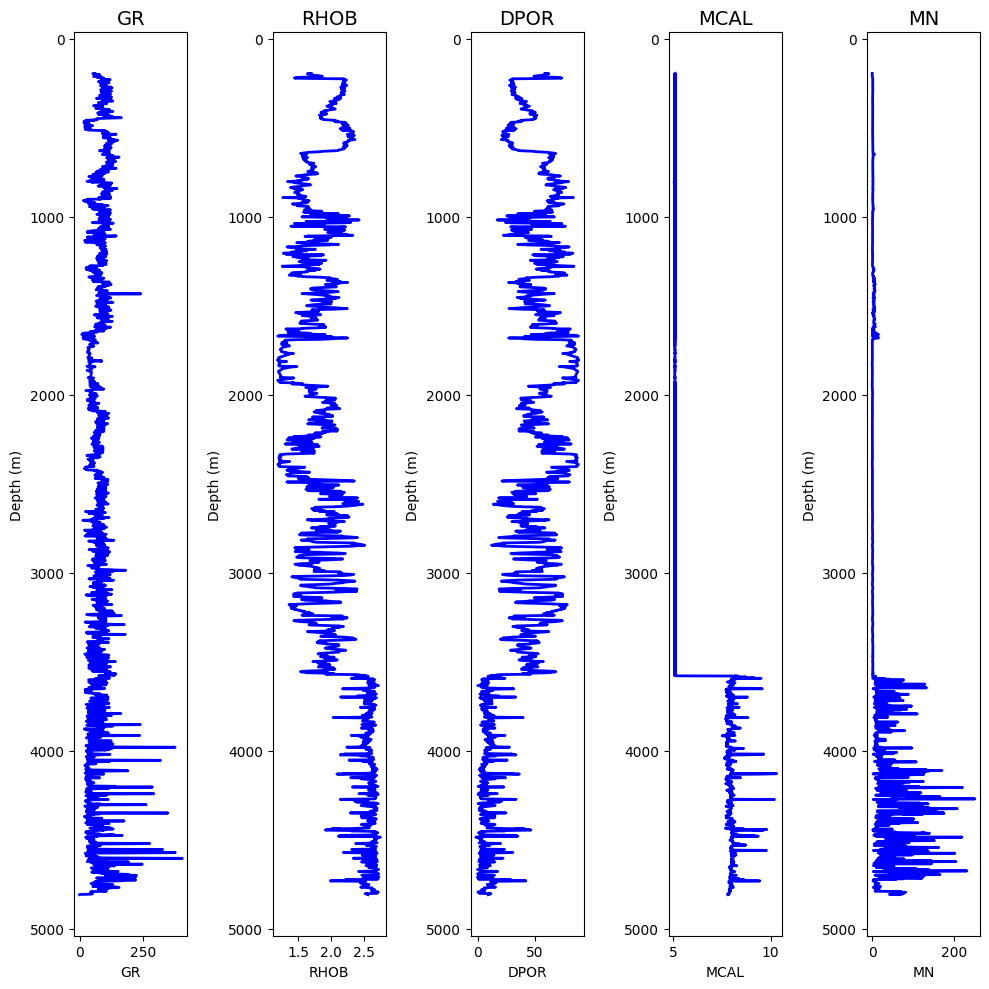

In [ ]:
# Figure 5:

# Plottingt the Logs

# Specify the well logs to plot
well_logs = ['GR', 'RHOB', 'DPOR', 'MCAL', 'MN']

# Create a figure with multiple subplots
fig, axes = plt.subplots(1,5, figsize=(10, 10))

# Iterate over each log and create a subplot
for i, log in enumerate(well_logs):
    axes[i].plot(original_data[log], original_data['Depth'], label=log, color='blue', linewidth=2)
    axes[i].invert_yaxis()  # Invert Y-axis for depth increasing downward
    axes[i].set_xlabel(log)
    axes[i].set_ylabel('Depth (m)')
    axes[i].set_title(f'{log}', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


**Figure 5:**

The figure above shows us a visualization of the Gamma Ray (GR), Bulk Desnity (RHOB), Desnity Porosity (DPOR), Normal Caliper (MCAL), and Resistivity (MN) logs in respect to depth.

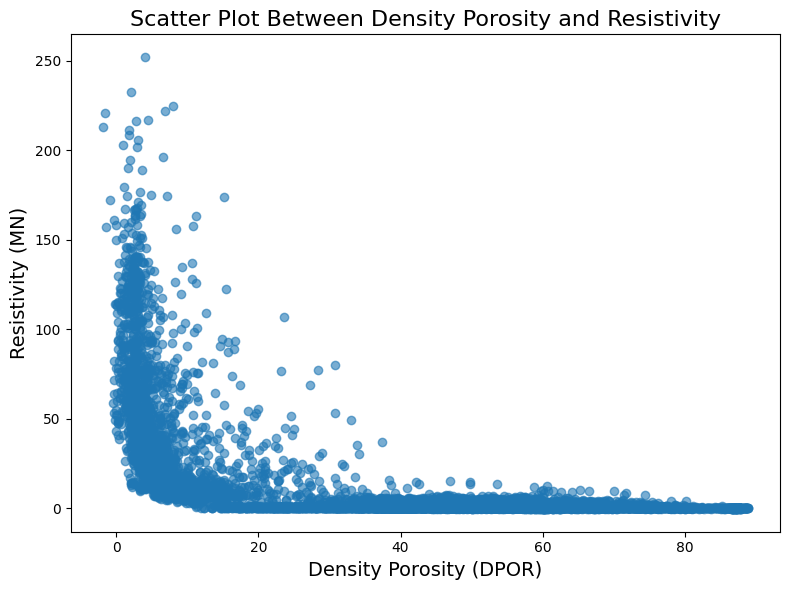

In [ ]:
# Figure 6:

# Scatter plot between Desnity Porosity (DPOR) and Resistivity (MN)
plt.figure(figsize=(8, 6))

# Plot the scatter plot
plt.scatter(original_data['DPOR'], original_data['MN'], alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot Between Density Porosity and Resistivity', fontsize=16)
plt.xlabel('Density Porosity (DPOR)', fontsize=14)
plt.ylabel('Resistivity (MN)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Figure 6:**

The scatter plot shows the relationship between Density Porosity (DPOR) and Resistivity (MN). The plot indicates that Resistivity decreases as the Density Porosity (DPOR) increases, with most data points clustering at lower DPOR values and showing higher Resistivity values. This suggests that higher porosity in the dataset may be associated with water-saturated formations, which is typically less desirable in terms of hydrocarbon potential.

## Section 3: Unsupervised Learning Methods

###Method 1: K means


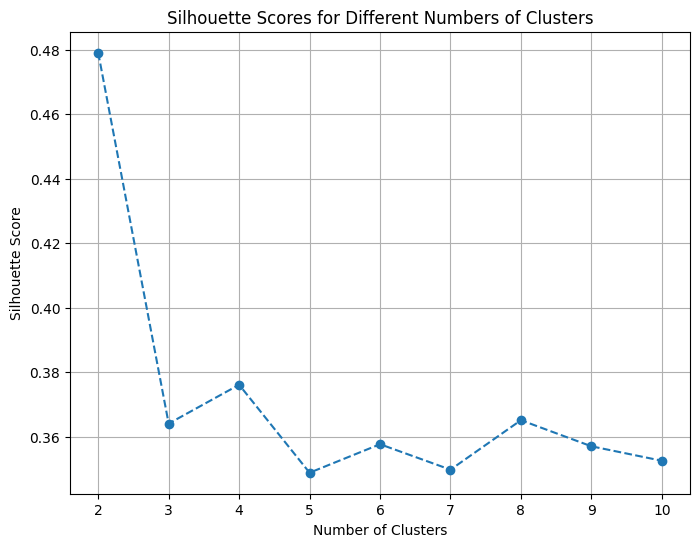

The optimal number of clusters based on Silhouette Score is: 2


In [ ]:
# Figure 7:

# Before doing the KMeans cluster I want to determine the number of clusters to use

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Prepare the data
data_for_clustering = original_data[['GR', 'RHOB', 'DPOR', 'MN']]

# Standardizing the data for KMeans
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_clustering)

# Step 2: Calculate the Silhouette Scores for different numbers of clusters
silhouette_scores = []
range_of_clusters = range(2, 11)

for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_standardized)
    cluster_labels = kmeans.predict(data_standardized)
    score = silhouette_score(data_standardized, cluster_labels)
    silhouette_scores.append(score)

# Step 3: Plot the Silhouette Scores for each number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_of_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_of_clusters)
plt.grid(True)
plt.show()

# Step 4: Find the optimal number of clusters
optimal_clusters = range_of_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {optimal_clusters}")


**Figure 7:**

This plot shows the Silhouette Scores for different numbers of clusters in my dataset. This helps me determine the optimal number of clusters for the KMeans clustering. The Silhouette Score decreases as I increase the number of clusters, especially for 3 clusters and beyond. This suggests that having more than 2 clusters does not improve the cohesiveness and separation of the data points. As such, based on the plot, the optimal number of clusters is 2, as it corresponds to the highest Silhouette Score of 0.48. This means that the clustering at 2 clusters is the most well-separated and cohesive.

In [27]:
# Check if the 'KMeans_Cluster' column has been added to the dataframe
original_data.head()

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR,MCAL_normalized,DPOR_category,KMeans_Cluster
0,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576,5.062155,NaN,0
1,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495,5.056202,NaN,0
2,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944,5.040159,NaN,0
3,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645,5.041067,NaN,0
4,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659,5.050249,NaN,0


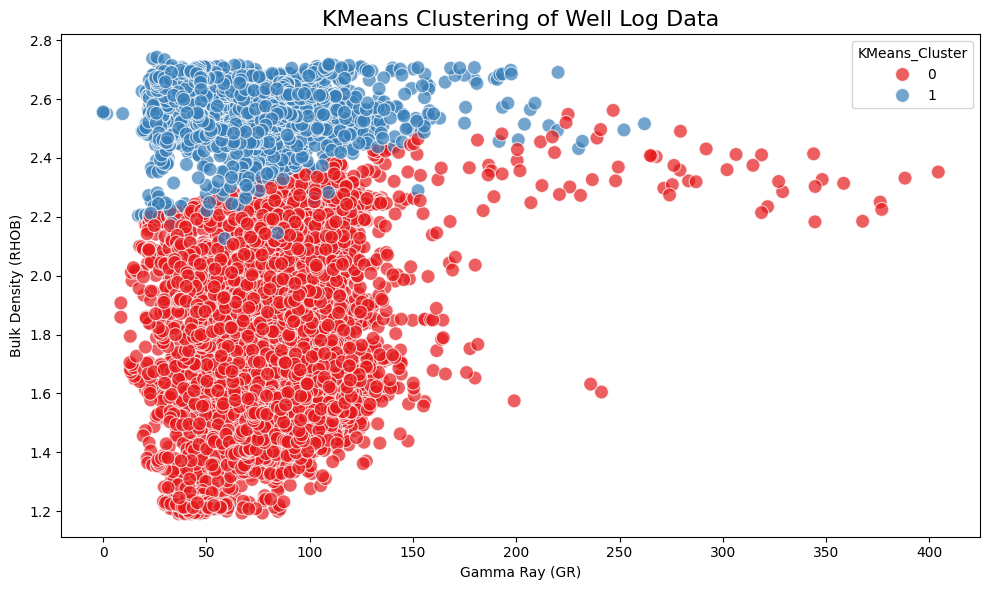

In [ ]:
# Figure 8:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Apply KMeans with the optimal number of clusters (found from the previous code)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)  # Use the optimal number of clusters
clusters = kmeans.fit_predict(data_standardized)

# Step 2: Add the cluster labels to the DataFrame
original_data['KMeans_Cluster'] = clusters

# Step 3: Visualize the KMeans clusters (e.g., using GR and RHOB)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GR', y='RHOB', hue='KMeans_Cluster', data=original_data, palette='Set1', s=100, alpha=0.7)

# Add titles and labels
plt.title('KMeans Clustering of Well Log Data', fontsize=16)
plt.xlabel('Gamma Ray (GR)')
plt.ylabel('Bulk Density (RHOB)')

# Show the plot
plt.tight_layout()
plt.show()


**Figure 8:**

The plot shows the KMeans clustering results of my well log data, specifically Gamma Ray (GR) vs Bulk Density (RHOB). The data points are colored based on the KMeans cluster they belong to, with two clusters indicated (0,1).

Cluster 0 (Red): Represents a group with lower Gamma Ray (GR) values and more spread out but relatively low Bulk Density (RHOB).  It indicates a cleaner, less consolidated formation. This combination suggests a formation with lower mineral content, potentially indicating more porous rocks, which could have higher porosity and permeability.

Cluster 1 (Blue): Represetns a group of lower Gamma Ray (GR) values, and higher Bulk Density (RHOB) values, often suggesting a more compact, non-shaly formation, potentially with lower porosity.



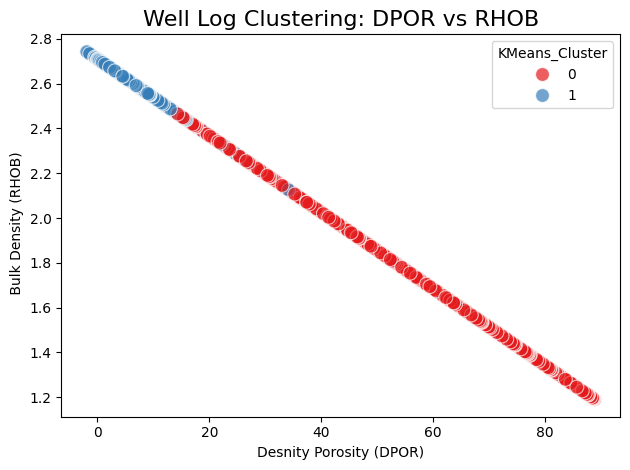

In [25]:
 # Figure 9:

# Visualize clusters with different well log combinations

# Use the cluster column to color the data points by their assigned cluster
sns.scatterplot(x=original_data['DPOR'], y=original_data['RHOB'], hue=original_data['KMeans_Cluster'], palette='Set1', s=100, alpha=0.7)

# Add labels and title
plt.title('Well Log Clustering: DPOR vs RHOB', fontsize=16)
plt.xlabel('Desnity Porosity (DPOR)')
plt.ylabel(' Bulk Density (RHOB)')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 9:**

The scatter plot shows the relationship between Density Porosity (DPOR) and Bulk Density (RHOB). The DPOR and RHOB values are inversely related, which is common because as porosity increases (more void space), the bulk density typically decreases. The plot shows how these two parameters vary across the different clusters, potentially indicating different lithologies or geological zones in the subsurface.

Cluster 0 (Red): These points have a more spread out Bulk Density (RHOB) that decreases and high Density Porosity (DPOR). This suggests that the Red points represent geological formations that are  porous and potentially unconsolidated.


Cluster 1 (Blue): These points have a much higher Bulk Density (RHOB) and very low Density Porosity (DPOR). This suggests formations that are dense and consolidated. It could be compact rock formations with fewer pores, possibly tight sandstone, where the density is high due to the minerals, but the porosity is low.

In [63]:
from sklearn.metrics import silhouette_score

# Get the cluster labels from KMean
kmeans_labels = kmeans.labels_

# Calculate the Silhouette Score
sil_score_kmeans = silhouette_score(data_standardized, kmeans_labels)

print(f"Silhouette Score for KMeans: {sil_score_kmeans}")

Silhouette Score for KMeans: 0.47909928896746334


### Method 2: PCA

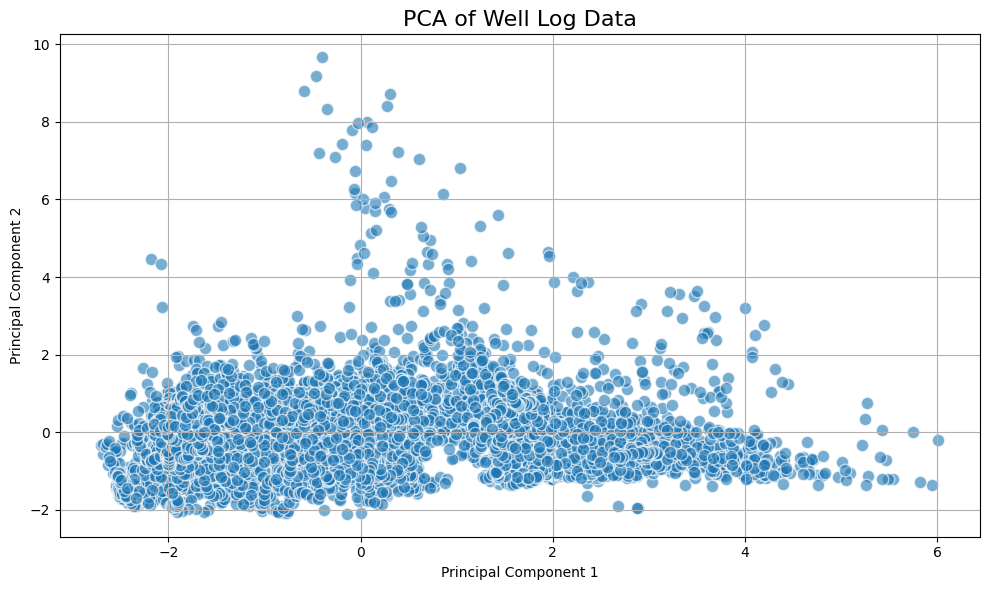

Explained variance ratio by component: [0.61696001 0.24235241]
Total explained variance: 0.8593124172249665


In [35]:
# Figure 10:

# Applying PCA to my dataset

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Step 1: Select the columns for PCA
data_for_pca = original_data[['GR', 'RHOB', 'DPOR', 'MN']]

# Step 2: Standardize the data (important for PCA)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_pca)

# Step 3: Apply PCA and reduce to 2 components for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_standardized)

# Step 4: Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Step 5: Visualize the PCA results by plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.6, edgecolors='w', s=80)

# Add title and labels
plt.title('PCA of Well Log Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Step 6: Optionally, print the explained variance ratio for each principal component
print(f'Explained variance ratio by component: {pca.explained_variance_ratio_}')
print(f'Total explained variance: {sum(pca.explained_variance_ratio_)}')


**Figure 10:**

This plot represents a 2D view of the result of Principal Component Analysis (PCA) applied to my well log data, specifically the first two principal components, Principal Component 1 and Principal Component 2. The data is spread along PCA1, which represents the direction of maximum variance in my dataset showing some significant clustering or variation. While along PCA2, there is also variation, though it's smaller in comparison to PCA1, which is typical because PCA1 captures the most significant variation.
The points are scattered, but there seems to be a dense grouping near the center and some spread as you move outward along both axes.

To score the PCA, I used the explained variance ratios, which show that PCA1 captures 61.7% of the variance, and PCA2 captures 24.2%. This means that together, these two components explain 85.93% of the total variance in the dataset. As such, I am reducing the data's dimensionality efficiently without losing much important information.

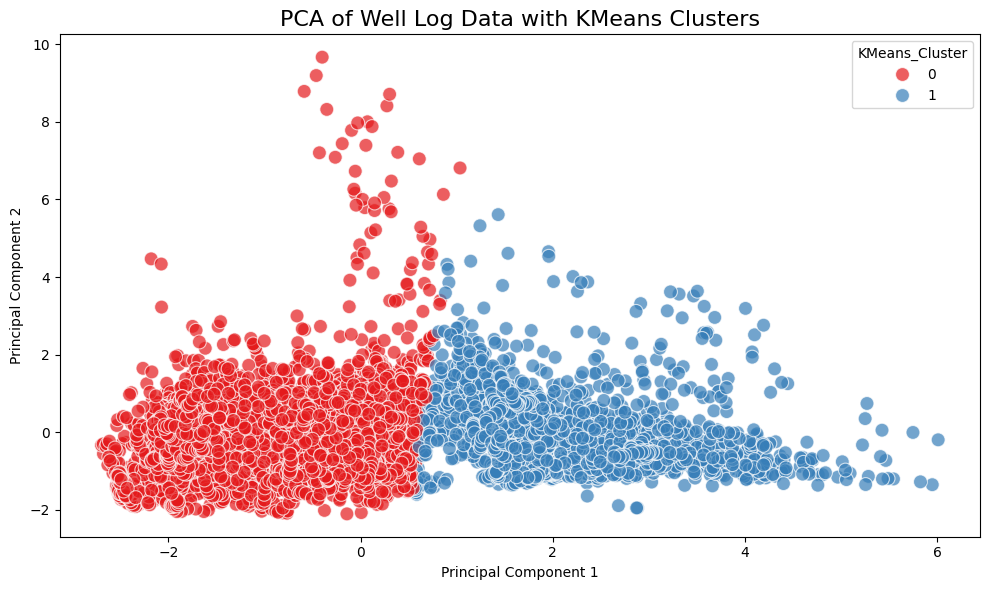

In [41]:
 # Figure 11:

# Applying PCA to my dataset colored with KMean cluster

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Select the columns for PCA
data_for_pca = original_data[['GR', 'RHOB', 'DPOR', 'MN']]

# Step 2: Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_pca)

# Step 3: Apply PCA and reduce to 2 components for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_standardized)

# Step 4: Add the 'KMeans_Cluster' column from original_data to pca_df
pca_df['KMeans_Cluster'] = original_data['KMeans_Cluster']

# Step 5: Create a DataFrame for PCA results and add the cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['KMeans_Cluster'] = clusters

# Step 6: Visualize the PCA results with KMeans clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)

# Add title and labels
plt.title('PCA of Well Log Data with KMeans Clusters', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

# Show the plot
plt.show()

**Figure 11:**

This plot also represents a 2D view of the result of Principal Component Analysis (PCA) applied to my well log data, but this time with KMeans cluster labels applied, with the points colored according to their cluster labels.
The clustering suggests that the two clusters exhibit different patterns across the principal components, with relatively little overlap, which suggests that the clustering was effective in distinguishing different data patterns. This might correspond to different types of geological features or well log behaviors.



In [37]:
# I want to see the loadings for PCA1 and PCA2 to see what they are most influenced by

# Get the loadings for each principal component
loadings = pca.components_

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=data_for_pca.columns, index=[f'PC{i+1}' for i in range(len(loadings))])

# Display the loadings
print(loadings_df)

# See the loadings for PCA1 and PCA2 specifically
print("PCA1 Loadings: ")
print(loadings_df.loc['PC1'])

print("PCA2 Loadings: ")
print(loadings_df.loc['PC2'])


           GR      RHOB      DPOR        MN
PC1 -0.158117  0.610659 -0.610659  0.478737
PC2  0.978826  0.142067 -0.142068 -0.039147
PCA1 Loadings: 
GR     -0.158117
RHOB    0.610659
DPOR   -0.610659
MN      0.478737
Name: PC1, dtype: float64
PCA2 Loadings: 
GR      0.978826
RHOB    0.142067
DPOR   -0.142068
MN     -0.039147
Name: PC2, dtype: float64


PCA1 is most heavily influenced by Bulk Density (RHOB) and Density Porosity (DPOR), with both variables having strong loadings around 0.6 and -0.6, respectively. While PCA2 is strongly influenced by Gamma Ray (GR), with the highest loading (0.9) among the four features. The other features contribute much less to PCA2


### Method 3: DB Scan

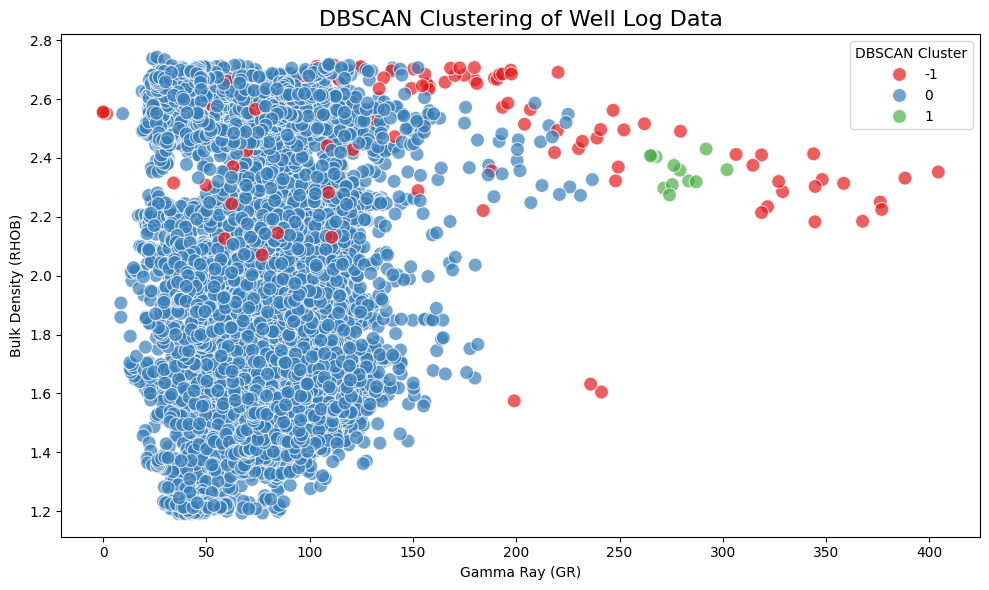

In [59]:
# Figure 12:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Select the columns for DBSCAN
data_for_dbscan = original_data[['GR', 'RHOB', 'DPOR', 'MN']]

# Step 2: Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_dbscan)

# Step 3: Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_standardized)

# Step 4: Add the DBSCAN cluster labels to the original data
original_data['DBSCAN_Cluster'] = dbscan_clusters

# Step 5: Visualize the DBSCAN results
plt.figure(figsize=(10, 6))

# Plot the data with different clusters
sns.scatterplot(x='GR', y='RHOB', hue='DBSCAN_Cluster', palette='Set1', data=original_data, s=100, alpha=0.7, edgecolor='w')

# Add title and labels
plt.title('DBSCAN Clustering of Well Log Data', fontsize=16)
plt.xlabel('Gamma Ray (GR)')
plt.ylabel('Bulk Density (RHOB)')
plt.legend(title='DBSCAN Cluster')

# Show the plot
plt.tight_layout()
plt.show()


**Figure 12:**

The plot shows the results of DBSCAN clustering applied to the well log data. The points are colored based on their assigned DBSCAN cluster.
The blue and green points represent two distinct regions in the data with different characteristics. While the red points represent noise or outliers that DBSCAN couldn't associate with the primary clusters.

In [61]:
from sklearn.metrics import silhouette_score

# Get the labels from the DBSCAN model
dbscan_labels = dbscan.labels_

# Calculate the silhouette score
sil_score = silhouette_score(data_standardized, dbscan_labels)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.5805659940504558


##Questions:

**Quetions 1: Which method did you like the most?**

 The method I liked the most is PCA (Principal Component Analysis) with KMeans Clustering because it reduced the dimensionality of the data, making it easier to visualize. After performing PCA, I could see how the data is grouped in a 2D space. KMeans clustering helped to segment the data into distinct groups.

**Question 2: Which method did you like the least?**

The method I liked the least is DBSCAN. The challenges with DBSCAN are that the algorithm might not always form clusters with the same characteristics, and it labels some points as noise (label -1) where it might not be. Also, playing with the parameters of DBSCAN was confusing.

**Question 3: How did you score these unsupervised models?**

To evaluate the clustering performance, I used the Silhouette Score for both KMeans and DBSCAN. The Silhouette Score provides an indication of how well the data points are clustered, with higher scores reflecting better/defined clusters. For both KMeans and DBSCAN, the scores were around 0.5, suggesting that the clustering was somewhat meaningful, but there is still room for improvement, especially with DBSCAN, where some data points were considered noise (-1).

For the PCA (Principal Component Analysis) method, I assessed the model using the explained variance ratios of the principal components. The first principal component explained 61.7% of the variance, while the second explained 24.2%. Together, these components captured about 85.9% of the total variance in the data, indicating that the PCA transformation was effective in reducing dimensionality while retaining most of the important information

**Question 4: Did the output align with your geologic understanding?**

In a general sense, yes, the results did align with geological expectations. The different clusters corresponded to variations in well log data (such as Gamma Ray, Bulk Density, and Density Porsity), which can indicate different geological formations such as shale or sandstone.


**Question 5: What did you want to learn more about?**


I would like to dive deeper into the methods I used to understand how they differ from one another, as they produced relatively similar results. I'm also interested in exploring other clustering techniques, and see if they fit better with my dataset. Additionally, I would like to learn how to fine-tune parameters, especially for DBSCAN. Moreover, I want to explore whether the similarity in results is due to the nature of the dataset, user error, or if these methods naturally produce similar outputs.

**Question 6: Did you pre-process your data?**

Yes, before starting with the unsupervised learning methods, I did some initial data cleaning to pre-process the data. Then, I performed standardization of the data. Standardization ensures that each feature contributes equally to the analysis, which is important since PCA and DBSAN are especially sensitive to the scale of the features.

**Question 7: What was a decision you were most unsure about?**

First, I was unsure about which methods to use that would be best with my dataset. Then, I was unsure about the choice of the number of clusters in KMeans, so I used Silhouette scores to determine the optimal number of clusters, but the results could vary depending on the dataset's characteristics. DBSCAN, on the other hand, required careful tuning of the eps (epsilon) and min_samples parameters to ensure meaningful clustering. The uncertainty around setting these hyperparameters might have impacted the results.


